Looping Graph

In [1]:
from langgraph.graph import StateGraph, END
import random
from typing import Dict, List, TypedDict

In [2]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int
    

In [3]:
def greeting_node(state: AgentState) -> AgentState:
    """ A node that greets the user and initializes the state."""
    state['name'] = f"Hi there, {state['name']}!"
    state['counter'] = 0
    
    return state

def random_number_node(state: AgentState) -> AgentState:
    """ A node that generates a random number and updates the state."""
    state['number'].append(random.randint(1, 100))
    state['counter'] += 1
    
    return state

def shoudl_continue_node(state: AgentState) -> AgentState:
    """ Function to determine if the user wants to continue."""
    if state['counter'] < 5:
        print("ENTERING LOOP", state['counter'])
        return "loop" # Continue to loop if less than 5 numbers generated
    else:
        return "exit" # Exit if 5 numbers have been generated

In [5]:
stateGraph = StateGraph(AgentState)

stateGraph.add_node("greeting", greeting_node)
stateGraph.add_node("random_number", random_number_node)
stateGraph.add_edge("greeting", "random_number")

stateGraph.add_conditional_edges(
    "random_number",
    shoudl_continue_node,
    {
        "loop": "random_number",
        "exit": END
    }
)

stateGraph.set_entry_point("greeting")

app = stateGraph.compile()


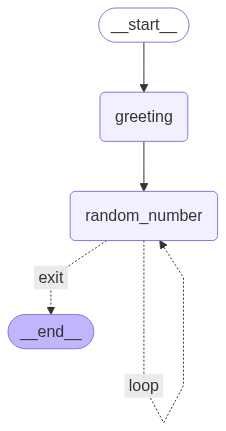

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
app.invoke(
    {"name": "Anurag", "number": [], "counter": -1} 
)

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Anurag!', 'number': [62, 27, 48, 84, 46], 'counter': 5}